# Attention Mechanisms in Clinical Text Classification: A Comparative Evaluation

# Results on MIMIC-III

In [1]:
# Import libraries
# built-in libraries
import os
import sys
import pickle
import warnings
warnings.filterwarnings("ignore")
from typing import List

try:
    root = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
except NameError:
    root = os.path.dirname(os.getcwd())
sys.path.append(root)

# installed libraries
import numpy as np
np.random.seed(42)
import scipy.stats as st

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set path to results
path_results = os.path.join(root, 'results')

In [2]:
def ci_95(x: np.array, ci: float = 0.95) -> float:
    """
    Function that calculates the confidence interval for a given array
    
    Parameters
    ----------
    x : np.array
        Array of floats
    ci : float; default=0.95
        confidence level
    """
    cint_95 = st.t.interval(ci, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return cint_95[1] - np.mean(x)

In [3]:
def get_xdeltas_barplot(width: float = 1, gap_width: float = 1.5, n_bars = 6) -> List[float]:
    """
    Function that computes offset values for barplot placements. The barplot is expected to show two related values
    right next to eather other.
    
    Parameters
    ----------
    width : float; default = 1
        Expected witdh of bar in barplot
    gap_width : float; default = 1.5
        Expected width between bars in barplot
    n_bars : int; default = 6
        Number of bar sub-positions per X coordinate 
        
    Returns
    -------
    x_pos_micros : List[float]
        List containing offset values for micro F1-scores
    x_pos_macros : List[float]
        List containing offset values for macro F1-scores
        
    """
    # Get sub-positions
    
    helper_arr = np.arange(n_bars / 2 * (-1), n_bars / 2 + 1, 1, dtype=int)
    ns = list(helper_arr[helper_arr != 0])
    
    x_pos_micros = []
    x_pos_macros = []
    for n in ns:
        if n < 0:
            pos = n * width + gap_width * (n + 1) - 0.5 * gap_width
        elif n > 0:
            if n == 1:
                pos = 0.5 * gap_width
            else:
                pos = 0.5 * gap_width + (n - 1) * width + (n - 1) * gap_width


        x_pos_micros.append(round(pos, 1))
        x_pos_macros.append(round(pos + 1,1 ))
        
    print(f'x_pos_micros: {x_pos_micros}')
    print(f'x_pos_macros: {x_pos_macros}')

    return x_pos_micros, x_pos_macros

# Results Section A: MIMIC-III-Full

This section shows the following results:
- Overall
- Quartile Performance

## Results: MIMIC-III-Full - Overall


In [4]:
# Key variables
averages = ['micro', 'macro']
models = ['CNN', 'BiGRU', 'BiLSTM', 'CLF']
atts = ['baseline', 'target', 'random', 'pretrained', 'hierarchical_random', 'hierarchical_pretrained']



In [5]:
# Load results data
df_full = pd.read_excel(os.path.join(path_results, 'results_section_A', 'MimicFull_scores_final.xlsx')).drop(['Unnamed: 0'], axis=1)
# Group data based on model and attention or baseline method
df_full_grp = df_full.groupby(['Model', 'att_module'])[['f1_macro_sk', 'f1_micro_sk']].agg(['mean', ci_95]).reset_index()
# Remove multi-level column indexing and corrent column naming
df_full_grp.columns = df_full_grp.columns.map('{0[0]}_{0[1]}'.format)
df_full_grp = df_full_grp.rename(columns={"Model_": "model", "att_module_": "att_module"})
df_full_grp

,model,att_module,f1_macro_sk_mean,f1_macro_sk_ci_95,f1_micro_sk_mean,f1_micro_sk_ci_95
0,BiGRU,baseline,0.03020,0.002388,0.435200,0.008018
1,BiGRU,hierarchical_pretrained,0.06140,0.003787,0.533200,0.003766
2,BiGRU,hierarchical_random,0.05760,0.007481,0.525800,0.006233
3,BiGRU,pretrained,0.06220,0.005297,0.534600,0.005089
4,BiGRU,random,0.06000,0.007240,0.530800,0.006108
5,BiGRU,target,0.03360,0.005089,0.437400,0.009481
6,BiLSTM,baseline,0.02340,0.001416,0.377400,0.006488
7,BiLSTM,hierarchical_pretrained,0.06100,0.008954,0.536800,0.008709
8,BiLSTM,hierarchical_random,0.05500,0.005757,0.522400,0.010186
9,BiLSTM,pretrained,0.06040,0.008980,0.537400,0.007481


x_pos_micros: [-6.8, -4.2, -1.8, 0.8, 3.2, 5.8]
x_pos_macros: [-5.8, -3.2, -0.8, 1.8, 4.2, 6.8]

Visualize results for MIMIC-III-Full:



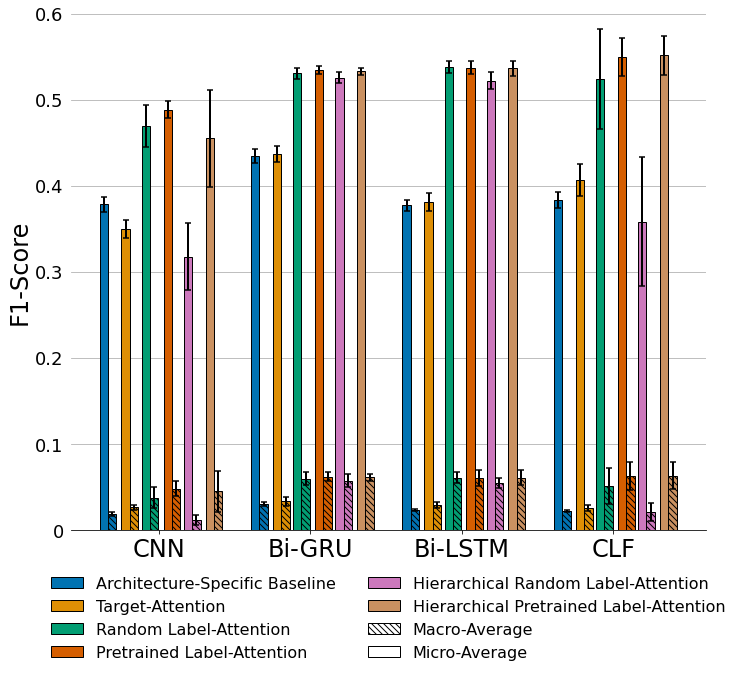

In [6]:
width = 1
# Visualize scores
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

# Scale X-positions - impacts proximity between the bars of different text-encoder architectures
X = np.arange(len(models)) * 18
x_pos_micros, x_pos_macros = get_xdeltas_barplot(width=width, gap_width=1.5, n_bars=6)

# Color scale
colors = sns.color_palette('colorblind').as_hex()[:len(atts)]

# We are plotting the micro and macro F1-scores right next to each other
for average in averages:
    # F1-score averages have different offset values
    if average == 'micro':
        x_deltas = x_pos_micros
    elif average == 'macro':
        x_deltas = x_pos_macros
    
    # Loop through considered text-encoder architectures (i.e., models)
    # Each model has its own primary x-coordinate
    for x, model in zip(X, models):
        df_model = df_full_grp[df_full_grp['model']==model]
        
        # Loop through baseline and attention mechanisms list
        # Each method has its own offset
        # Each method has its own color
        for c, (x_delta, att) in enumerate(zip(x_deltas, atts)):
            # Get values from dataframe
            height = df_model[df_model['att_module']==att][f'f1_{average}_sk_mean']
            err = df_model[df_model['att_module']==att][f'f1_{average}_sk_ci_95']

            # Plot results
            if average == 'macro':
                plt.bar(x = x + x_delta, height=height, yerr=err,
                        color=colors[c], edgecolor='k',
                        width=width, hatch='\\\\\\\\', align='edge', zorder=3,
                        error_kw=dict(lw=2, capsize=3, capthick=1.5, ecolor='k'))
            else:
                plt.bar(x = x + x_delta, height=height, yerr=err,
                        color=colors[c], edgecolor='k',
                        width=width, align='edge', zorder=3,
                        error_kw=dict(lw=2, capsize=3, capthick=1.5, ecolor='k'))
                
# Add descriptions and corrext axis
ax.set_xticks(X+0.25)
xlabels = ['CNN', 'Bi-GRU', 'Bi-LSTM', 'CLF']
ax.set_xticklabels(xlabels, fontsize=24)


ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], fontsize=18)
ax.set_ylim(0, 0.6)

#plt.xlabel('Text Encoder Architecture', fontsize=18)
plt.xlabel('')
plt.ylabel('F1-Score', fontsize=24)

ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)

fig.tight_layout()
plt.grid( which='major', axis='y', zorder=0)
plt.tick_params(left = False)

# generate legend
xlabels = ['Architecture-Specific Baseline', 'Target-Attention', 
                    'Random Label-Attention', 'Pretrained Label-Attention',
                    'Hierarchical Random Label-Attention', 'Hierarchical Pretrained Label-Attention']
legend_elements = []

for color, label in zip(colors, xlabels):
    patch = Patch(facecolor=color, label=label, edgecolor='k')
    legend_elements.append(patch)

legend_elements.append(Patch(label='Macro-Average', hatch='\\\\\\\\', edgecolor='k', facecolor='none', linewidth=1))
legend_elements.append(Patch(label='Micro-Average', hatch=None, edgecolor='k', facecolor='none', linewidth=1))

plt.legend(loc='lower center', fontsize=16, ncol=2, frameon=False, bbox_to_anchor=(0.5,-0.28),
          handles=legend_elements)

print('\nVisualize results for MIMIC-III-Full:\n')
plt.show()

## Results: MIMIC-III-Full - Quartile Performance

In [7]:
# Load results data
df_full_q = pd.read_excel(os.path.join(path_results, 'results_section_A', 'MimicFull_scores_quartile_final.xlsx')).drop(['Unnamed: 0'], axis=1)
cols_q = ['f1_macro_Q0', 'f1_micro_Q0', 'f1_macro_Q1', 'f1_micro_Q1', 'f1_macro_Q2', 'f1_micro_Q2', 'f1_macro_Q3', 'f1_micro_Q3']
df_full_q_grp = df_full_q.groupby(['Model', 'att_module'])[cols_q].mean().reset_index()

# Reshape dataframe to have quartile information as column
df_full_q_grp = pd.melt(df_full_q_grp, id_vars=['Model', 'att_module'], value_vars=['f1_macro_Q0', 'f1_micro_Q0', 
                                                                      'f1_macro_Q1', 'f1_micro_Q1',
                                                                     'f1_macro_Q2', 'f1_micro_Q2',
                                                                     'f1_macro_Q3', 'f1_micro_Q3'])
df_full_q_grp[['metric', 'average', 'label']] = df_full_q_grp.variable.str.split('_', expand=True)

# Rename quartiles
Quartiles = ['Q1', 'Q2', 'Q3']
df_full_q_grp = df_full_q_grp[df_full_q_grp['label'].isin(Quartiles)]
df_full_q_grp['label'] = df_full_q_grp['label'].map({'Q1': 'Q2',
                                                     'Q2': 'Q3',
                                                     'Q3': 'Q4'})
# Show results for micro scores
df_full_q_grp = df_full_q_grp[df_full_q_grp['average']=='micro']
df_full_q_grp = df_full_q_grp.groupby(['Model', 'att_module', 'label'])['value'].mean().reset_index()
# Reshape dataframe again
df_full_q_grp = df_full_q_grp.pivot_table(values='value', index=['Model', 'att_module'], columns='label')
df_full_q_grp

label                               Q2        Q3       Q4
Model  att_module                                        
BiGRU  baseline                 0.0000  0.012400  0.45120
       hierarchical_pretrained  0.0110  0.072000  0.55000
       hierarchical_random      0.0024  0.057800  0.54260
       pretrained               0.0120  0.072000  0.55180
       random                   0.0052  0.067800  0.54740
       target                   0.0006  0.028200  0.45360
BiLSTM baseline                 0.0000  0.009000  0.39220
       hierarchical_pretrained  0.0040  0.059600  0.55400
       hierarchical_random      0.0038  0.055000  0.53940
       pretrained               0.0094  0.059600  0.55460
       random                   0.0084  0.062200  0.55540
       target                   0.0000  0.024400  0.39560
CLF    baseline                 0.0000  0.003000  0.39825
       hierarchical_pretrained  0.0000  0.054400  0.56920
       hierarchical_random      0.0000  0.005667  0.37300
       pretrained               0.0006  0.050000  0.56720
       random                   0.0000  0.037200  0.54120
       target                   0.0000  0.010200  0.42160
CNN    baseline                 0.0000  0.002000  0.39340
       hierarchical_pretrained  0.0062  0.060600  0.47120
       hierarchical_random      0.0000  0.001400  0.33120
       pretrained               0.0024  0.049000  0.50440
       random                   0.0018  0.023400  0.48540
       target                   0.0012  0.018000  0.36440

## Results: MIMIC-III-Full - Individual Label Performances

In [8]:
# Individual label performance

# Load dataframe with individual label performance
# Since the label space is very large, the majority of labels achieve a performance of 0 across all models
# To save memory we are removing and keeping track of these labels

# Load results chunkwise to be memory efficient
file_path = os.path.join(path_results, 'results_section_A', 'MimicFull_scores_individual_final.csv')

model_parameters = []
labels_kept = []


for c, chunk in enumerate(pd.read_csv(file_path, chunksize=5)):
    # Remove unwanted column
    chunk = chunk.drop(['Unnamed: 0'], axis=1)
    
    # Get model indicate varibales for current chunk and append those to list
    # We match these later to the dataset
    chunk_models = chunk.iloc[:, :15]
    model_parameters.append(chunk_models)
    
    # Get part of dataframe with only performance results
    chunk = chunk.iloc[:,15:]
    
    # Retain only columns / labels that have a performance other than 0 for any of the models in the chunk
    chunk_sub = chunk.loc[:, (chunk != 0).any(axis=0)]
    
    # Only add columns/labels to list that arent already in the list
    for label in chunk_sub.columns:
        if label not in labels_kept:
            labels_kept.append(label)
            
labels_dropped = []

for label in chunk.columns:
    if label not in labels_kept:
        labels_dropped.append(label)
        
        
        
# Load the dataset again and filter

chunks = []

for c, chunk in enumerate(pd.read_csv(file_path, chunksize=5)):
    chunk = chunk.drop('Unnamed: 0', axis=1)
    if c == 0:
        models = chunk.columns[:15].tolist()
    chunks.append(chunk[models+labels_kept])
    

print(f'Total number of lables: {len(labels_kept) + len(labels_dropped)}')
print(f'Number of labels kept: {len(labels_kept)}/{len(labels_kept) + len(labels_dropped)}')
print(f'Number of labels dropped: {len(labels_dropped)}/{len(labels_kept) + len(labels_dropped)}')

labels_kept = [col.split('_')[-1] for col in labels_kept]
labels_dropped = [col.split('_')[-1] for col in labels_dropped]

with open(os.path.join(root, 'data', 'processed', 'data_MimicFull', 'l_codes_MimicFull.pkl'), 'rb') as f:
    mimicFull_labels = pickle.load(f)

mimicFull_labelindices = [mimicFull_labels.index(label) for label in labels_kept]

with open(os.path.join(path_results, 'results_section_A', 'labels_kept.pkl'), 'wb') as f:
    pickle.dump(labels_kept, f)

with open(os.path.join(path_results, 'results_section_A', 'labels_kept_index.pkl'), 'wb') as f:
    pickle.dump(mimicFull_labelindices, f)
    
with open(os.path.join(path_results, 'results_section_A', 'labels_dropped.pkl'), 'wb') as f:
    pickle.dump(labels_dropped, f)    

dff_i_reduced = pd.concat(chunks)
dff_i_reduced

cols_new = []
for c, col in enumerate(dff_i_reduced.columns):
    if c > 14:
        col = col.split('_')[-1]
    cols_new.append(col)
        
dff_i_reduced.columns = cols_new 
        
dff_i_reduced.to_csv(os.path.join(path_results, 'results_section_A', 'mimicfull_scores_individual_final_reduced.csv'))
dff_i_reduced.to_excel(os.path.join(path_results, 'results_section_A', 'mimicfull_scores_individual_final_reduced.xlsx'))

## Analysis: Performance breakdown of attention types

#RQ1: Which type of attention consistently achieves the best-performance per label?

#    - Across all text encoder architectures combined
#    - For each text encoder architecture
#    - Across the label frequency quartiles

# Model load reduced dataset

dff_i_reduced = pd.read_csv(os.path.join(path_results, 'results_section_A', 'MimicFull_scores_individual_final_reduced.csv')).drop('Unnamed: 0', axis=1)

# Load dictionary describing each label
with open(os.path.join(root, 'data', 'processed', 'data_MimicFull', 'l_codes_dict_MimicFull.pkl'), 'rb') as f:
    mimicfull_quartiles = pickle.load(f)
    
with open(os.path.join(path_results, 'results_section_A', 'labels_kept.pkl'), 'rb') as f:
    labels_kept = pickle.load(f)

mimicfull_quartiles

d = {}
d_counts_kept = {}
for key, item in mimicfull_quartiles.items():
    quartile = item['quartile']
    freq = item['freq']
    if quartile not in d.keys():
        d[quartile] = []
    d[quartile].append(freq)
    
    
    if key in labels_kept:
        if quartile not in d_counts_kept.keys():
            d_counts_kept[quartile] = 1
        else:
            d_counts_kept[quartile] += 1
    

for q, freqs in d.items():
    max_freq = max(freqs)
    min_freq = min(freqs)
    
    if q != 0:
        kept_labels = d_counts_kept[q]
    else:
        kept_labels = 0 
    
    print(f'Frequency range for Q{q+1}: {min_freq}-{max_freq}; N Labels: {kept_labels}/{len(freqs)}')
    
    
d_above_100 = [freq for freq in d[3] if freq > 100]
dff_i_grp = dff_i_reduced.groupby(['Model', 'att_module'])[labels_kept].mean().reset_index()

dff_i_grp_melt = pd.melt(dff_i_grp, id_vars=['Model', 'att_module'], value_vars=labels_kept,
                         var_name='label', value_name='mean')

dff_i_grp_melt['quartile'] = dff_i_grp_melt.apply(lambda x: mimicfull_quartiles[x.label]['quartile'], axis=1)
dff_i_grp_melt

len(mimicfull_quartiles)

## Across all models

dff_i_nonzeros = dff_i_grp_melt[dff_i_grp_melt['mean']!=0]
idx = dff_i_nonzeros.groupby(['label'])['mean'].transform(max) == dff_i_nonzeros['mean']
dff_i_max = dff_i_nonzeros[idx].reset_index(drop=True)

dff_i_max['att_module'].value_counts()


# Split by quartiles

quartiles = [1, 2, 3]

for q in quartiles:
    print(f'Quartile: {q+1}')
    df_q = dff_i_grp_melt[dff_i_grp_melt['quartile']==q]
    df_q = df_q[df_q['mean'] != 0]
    idx = df_q.groupby(['label'])['mean'].transform(max) == df_q['mean']
    dff_i_max = df_q[idx].reset_index(drop=True)
    print(dff_i_max['att_module'].value_counts())

# Across each text encoder architecture

models = ['CNN', 'BiGRU', 'BiLSTM', 'CLF']

for model in models:
    print(model)
    df_model = dff_i_grp_melt[dff_i_grp_melt['Model']==model]

    df_model = df_model[df_model['mean'] != 0]
            
    idx = df_model.groupby(['label'])['mean'].transform(max) == df_model['mean']
    dff_i_max = df_model[idx].reset_index(drop=True)

    print(dff_i_max['att_module'].value_counts())
    print(sum(dff_i_max['att_module'].value_counts()))

    
    print()



models = ['CNN', 'BiGRU', 'BiLSTM', 'CLF']

for model in models:
    print(model)
    df_model = dff_i_grp_melt[dff_i_grp_melt['Model']==model]
    
    for q in quartiles:
        print(f'Quartile: {q+1}')
        df_q = df_model[df_model['quartile']==q]
                
        df_q = df_q[df_q['mean'] != 0]
            
        idx = df_q.groupby(['label'])['mean'].transform(max) == df_q['mean']
        dff_i_max = df_q[idx].reset_index(drop=True)
    
        print(dff_i_max['att_module'].value_counts())
        print()


Total number of lables: 8907
Number of labels kept: 2234/8907
Number of labels dropped: 6673/8907
Frequency range for Q4: 28-20046; N Labels: 1752/2248
Frequency range for Q3: 6-27; N Labels: 452/2312
Frequency range for Q2: 2-5; N Labels: 30/2437
Frequency range for Q1: 1-1; N Labels: 0/1910
Quartile: 2
pretrained                 13
random                     11
hierarchical_pretrained    10
hierarchical_random         6
target                      2
Name: att_module, dtype: int64
Quartile: 3
hierarchical_pretrained    191
pretrained                 143
random                     104
hierarchical_random         60
target                      40
baseline                     4
Name: att_module, dtype: int64
Quartile: 4
pretrained                 697
hierarchical_pretrained    589
random                     307
hierarchical_random        152
target                      48
baseline                    19
Name: att_module, dtype: int64
CNN
pretrained                 710
hierarchical_pretrai

# Results - Section B: MIMIC-III-50

In [9]:
df_50 = pd.read_excel(os.path.join(path_results, 'results_section_B', 'Mimic50_scores.xlsx')).drop(['Unnamed: 0'], axis=1)
# Group data based on model and attention or baseline method
df_50_grp = df_50.groupby(['Model', 'att_module'])[['f1_macro_sk', 'f1_micro_sk']].agg(['mean', ci_95]).reset_index()
# Remove multi-level column indexing and corrent column naming
df_50_grp.columns = df_50_grp.columns.map('{0[0]}_{0[1]}'.format)
df_50_grp = df_50_grp.rename(columns={"Model_": "model", "att_module_": "att_module"})
df_50_grp

,model,att_module,f1_macro_sk_mean,f1_macro_sk_ci_95,f1_micro_sk_mean,f1_micro_sk_ci_95
0,BiGRU,baseline,0.46468,0.012070,0.58596,0.007683
1,BiGRU,hierarchical_pretrained,0.55584,0.005706,0.65468,0.003152
2,BiGRU,hierarchical_random,0.50104,0.005591,0.61332,0.004901
3,BiGRU,pretrained,0.53352,0.004137,0.64292,0.002637
4,BiGRU,random,0.49596,0.006481,0.62196,0.003566
5,BiGRU,target,0.42640,0.009445,0.55160,0.006508
6,BiLSTM,baseline,0.34280,0.008073,0.47936,0.006595
7,BiLSTM,hierarchical_pretrained,0.52096,0.003367,0.63348,0.002756
8,BiLSTM,hierarchical_random,0.46468,0.010127,0.58648,0.008289
9,BiLSTM,pretrained,0.51572,0.005827,0.63328,0.004117


x_pos_micros: [-6.8, -4.2, -1.8, 0.8, 3.2, 5.8]
x_pos_macros: [-5.8, -3.2, -0.8, 1.8, 4.2, 6.8]


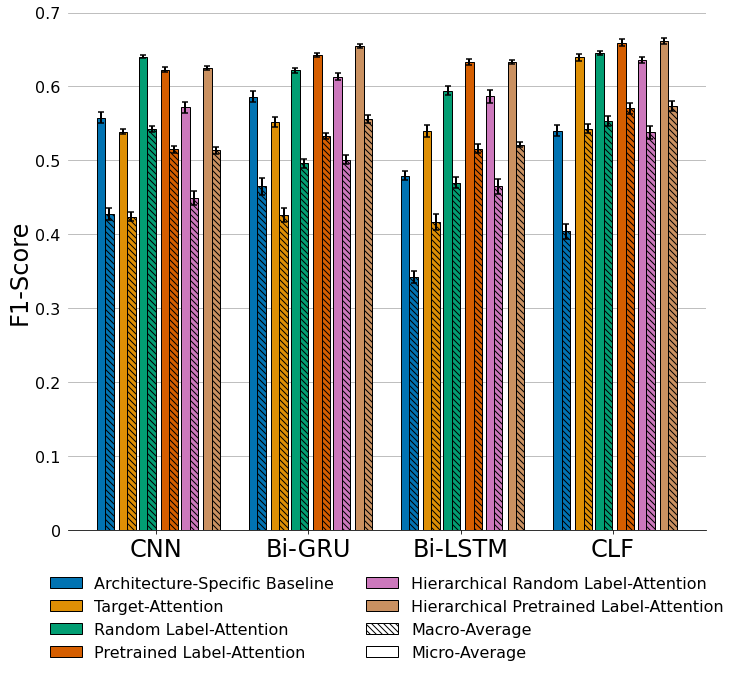

In [10]:
width = 1


# Visualize scores
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

# Scale X-positions - impacts proximity between the bars of different text-encoder architectures
X = np.arange(len(models)) * 18
x_pos_micros, x_pos_macros = get_xdeltas_barplot(width=width, gap_width=1.5, n_bars=6)

# Color scale
colors = sns.color_palette('colorblind').as_hex()[:len(atts)]

# We are plotting the micro and macro F1-scores right next to each other
for average in averages:
    # F1-score averages have different offset values
    if average == 'micro':
        x_deltas = x_pos_micros
    elif average == 'macro':
        x_deltas = x_pos_macros
    
    # Loop through considered text-encoder architectures (i.e., models)
    # Each model has its own primary x-coordinate
    for x, model in zip(X, models):
        df_model = df_50_grp[df_50_grp['model']==model]
        
        # Loop through baseline and attention mechanisms list
        # Each method has its own offset
        # Each method has its own color
        for c, (x_delta, att) in enumerate(zip(x_deltas, atts)):
            # Get values from dataframe
            height = df_model[df_model['att_module']==att][f'f1_{average}_sk_mean']
            err = df_model[df_model['att_module']==att][f'f1_{average}_sk_ci_95']

            # Plot results
            if average == 'macro':
                plt.bar(x = x + x_delta, height=height, yerr=err,
                        color=colors[c], edgecolor='k',
                        width=width, hatch='\\\\\\\\', align='edge', zorder=3,
                        error_kw=dict(lw=2, capsize=3, capthick=1.5, ecolor='k'))
            else:
                plt.bar(x = x + x_delta, height=height, yerr=err,
                        color=colors[c], edgecolor='k',
                        width=width, align='edge', zorder=3,
                        error_kw=dict(lw=2, capsize=3, capthick=1.5, ecolor='k'))
                
ax.set_xticks(X+0.25)
xlabels = ['CNN', 'Bi-GRU', 'Bi-LSTM', 'CLF']
ax.set_xticklabels(xlabels, fontsize=24)

ax.set_yticks(np.arange(0, 0.8, 0.1))
ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], fontsize=16)

#plt.xlabel('Text Encoder Architecture', fontsize=18)
plt.xlabel('')
plt.ylabel('F1-Score', fontsize=24)

ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)

fig.tight_layout()
plt.grid( which='major', axis='y', zorder=0)
plt.tick_params(left = False)



# generate legend
xlabels = ['Architecture-Specific Baseline', 'Target-Attention', 
                    'Random Label-Attention', 'Pretrained Label-Attention',
                    'Hierarchical Random Label-Attention', 'Hierarchical Pretrained Label-Attention']
legend_elements = []

for color, label in zip(colors, xlabels):
    patch = Patch(facecolor=color, label=label, edgecolor='k')
    legend_elements.append(patch)

legend_elements.append(Patch(label='Macro-Average', hatch='\\\\\\\\', edgecolor='k', facecolor='none', linewidth=1))
legend_elements.append(Patch(label='Micro-Average', hatch=None, edgecolor='k', facecolor='none', linewidth=1))

#plt.suptitle('Experimental Results for MIMIC-III-50', 
    #         fontsize=22, fontweight='bold', y=1.05, fontname='Helvetica')



plt.legend(loc='lower center', fontsize=16, ncol=2, frameon=False, bbox_to_anchor=(0.5,-0.28),
          handles=legend_elements)
ax.set_facecolor('w')
plt.show()

# Count Best-Performance Across Quartiles

In [11]:
with open(os.path.join(root, 'data', 'processed', 'data_Mimic50', 'l_codes_dict_Mimic50.pkl'), 'rb') as f:
    mimic50_quartiles = pickle.load(f)
    


In [12]:
######################
# Load results for label attention mechanisms
df_50_i = pd.read_excel(os.path.join(path_results, 'results_section_B', 'Mimic50_scores_individual.xlsx')).drop('Unnamed: 0', axis=1)
df_50_i = df_50_i.drop(['dataset', 'doc_max_len', 'batch_size', 'patience', 'embedding_scaling',
                      'word_embedding_dim', 'kernel_sizes', 'hidden_dim', 'dropout_p', 'scale',
                      'multihead', 'num_heads'], axis=1)
df_50_i_melt = pd.melt(df_50_i, id_vars=['Model', 'att_module', 'seed']).sort_values(['Model', 'seed', 'att_module', 'variable'])
df_50_i_melt[['metric', 'average', 'label']] = df_50_i_melt.variable.str.split('_', expand=True)
df_50_i_melt = df_50_i_melt.drop(['variable', 'metric', 'average'], axis=1)

df_50_i_melt['freq'] = df_50_i_melt.apply(lambda x: mimic50_quartiles[x.label]['freq'], axis=1)
df_50_i_melt['quartile'] = df_50_i_melt.apply(lambda x: mimic50_quartiles[x.label]['quartile'], axis=1)
#df_50_i_melt['desc'] = df_50_i_melt.apply(lambda x: mimic50_desc[x.label], axis=1)
df_50_i = df_50_i_melt.groupby(['Model', 'label', 'att_module', 'quartile', 'freq'])['value'].agg(['mean', 'std']).reset_index().sort_values(['Model'])
df_50_i = df_50_i.sort_values(['Model', 'label', 'att_module'])

idx = df_50_i.groupby(['label'])['mean'].transform(max) == df_50_i['mean']

df_50_i_max = df_50_i[idx].reset_index(drop=True)

df_50_i_max['att_module'].value_counts()

hierarchical_pretrained    30
pretrained                 11
random                      9
Name: att_module, dtype: int64

### Best Performance per Quartile

In [13]:
for q in [0, 1, 2, 3]:
    print(f'Quartile: {q+1}')
    dfq = df_50_i[df_50_i['quartile']==q]
    idx = dfq.groupby(['label'])['mean'].transform(max) == dfq['mean']

    dfq_max = dfq[idx].reset_index(drop=True)
    print(dfq_max['att_module'].value_counts())
    print()

Quartile: 1
hierarchical_pretrained    8
random                     3
pretrained                 2
Name: att_module, dtype: int64

Quartile: 2
hierarchical_pretrained    8
pretrained                 4
Name: att_module, dtype: int64

Quartile: 3
hierarchical_pretrained    8
random                     3
pretrained                 1
Name: att_module, dtype: int64

Quartile: 4
hierarchical_pretrained    6
pretrained                 4
random                     3
Name: att_module, dtype: int64



### Frequency Count of Labels achieving their best performance with a specific type of attention

In [14]:
models = ['CNN', 'BiGRU', 'BiLSTM', 'CLF']
for model in models:
    print(f'model: {model}')
    dfm = df_50_i[df_50_i['Model']==model]
    idx = dfm.groupby(['label'])['mean'].transform(max) == dfm['mean']

    dfm_max = dfm[idx].reset_index(drop=True)
    print(dfm_max['att_module'].value_counts())
    print()

model: CNN
random                     33
hierarchical_pretrained    12
pretrained                  7
hierarchical_random         1
Name: att_module, dtype: int64

model: BiGRU
hierarchical_pretrained    30
pretrained                 12
random                      8
hierarchical_random         6
Name: att_module, dtype: int64

model: BiLSTM
hierarchical_pretrained    21
pretrained                 19
random                      9
hierarchical_random         1
Name: att_module, dtype: int64

model: CLF
hierarchical_pretrained    27
pretrained                 13
random                     10
Name: att_module, dtype: int64



### Frequency Count of Labels achieving their best performance with a specific type of attention

In [15]:
models = ['CNN', 'BiGRU', 'BiLSTM', 'CLF']
for model in models:
    print(f'model: {model}')
    dfm = df_50_i[df_50_i['Model']==model]
    for q in [0, 1, 2, 3]:
        print(f'Quartile: {q+1}')
        dfq = dfm[dfm['quartile']==q]
        idx = dfq.groupby(['label'])['mean'].transform(max) == dfq['mean']

        dfq_max = dfq[idx].reset_index(drop=True)
        print(dfq_max['att_module'].value_counts())
        print()

model: CNN
Quartile: 1
random                     10
pretrained                  3
hierarchical_pretrained     2
hierarchical_random         1
Name: att_module, dtype: int64

Quartile: 2
random                     8
hierarchical_pretrained    3
pretrained                 1
Name: att_module, dtype: int64

Quartile: 3
random                     8
pretrained                 2
hierarchical_pretrained    2
Name: att_module, dtype: int64

Quartile: 4
random                     7
hierarchical_pretrained    5
pretrained                 1
Name: att_module, dtype: int64

model: BiGRU
Quartile: 1
hierarchical_pretrained    9
hierarchical_random        4
pretrained                 3
random                     3
Name: att_module, dtype: int64

Quartile: 2
hierarchical_pretrained    8
pretrained                 3
hierarchical_random        1
Name: att_module, dtype: int64

Quartile: 3
hierarchical_pretrained    8
random                     3
pretrained                 1
Name: att_module, dtype: int6

# Results Section C: MIMIC-III-Full - Multihead

In [16]:
# Load Multihead Label-Attention Results for MIMIC-III-Full
df_full_mh = pd.read_excel(os.path.join(path_results, 'results_section_C', 'MimicFull_MH_scores.xlsx'))
# File contains experiments performed with wrong data
df_full_mh = df_full_mh[df_full_mh['Model']!='CLF']
# Load correct results for CLF
df_full_mh_clf = pd.read_excel(os.path.join(path_results, 'results_section_C', 'MimicFull_MH_CLF_scores.xlsx'))
                        
# Combine both dataframes
df_full_mh = pd.concat([df_full_mh, df_full_mh_clf]).sort_values(['Model', 'dataset', 'att_module', 'num_heads', 'seed'])


# Drop all samples including results for MIMIC-III-50
df_full_mh = df_full_mh[df_full_mh['dataset']!='Mimic50'].reset_index(drop=True)

# Drop columns that are not necessary
df_full_mh = df_full_mh.drop(['epoch', 'doc_max_len', 'batch_size', 'patience', 'embedding_scaling', 'word_embedding_dim',
                   'kernel_sizes', 'hidden_dim', 'dropout_p', 'scale', 'multihead'], axis=1)
# Clean dataset
# dropping num_heads=='10' due to memory issues with certain attention
df_full_mh = df_full_mh[~df_full_mh['num_heads'].isin([10, 16])] 

# Group results
df_full_mh_grp = df_full_mh.groupby(['Model', 'att_module', 'num_heads'])[['f1_macro_sk', 'f1_micro_sk']].agg(['mean', ci_95]).reset_index()
df_full_mh_grp

# Remove multi-level indexed columns 
df_full_mh_grp.columns = df_full_mh_grp.columns.map('{0[0]}_{0[1]}'.format)
df_full_mh_grp = df_full_mh_grp.fillna(0)

df_full_mh_grp = df_full_mh_grp.rename(columns={'Model_': 'model', 'att_module_': 'att_module', 'num_heads_': 'num_heads'})

df_full_mh_grp
                   

,model,att_module,num_heads,f1_macro_sk_mean,f1_macro_sk_ci_95,f1_micro_sk_mean,f1_micro_sk_ci_95
0,BiGRU,hierarchical_pretrained,2,0.078000,0.007234,0.52025,0.013210
1,BiGRU,hierarchical_pretrained,4,0.072500,0.000919,0.52025,0.003528
2,BiGRU,hierarchical_pretrained,8,0.067000,0.038119,0.52150,0.031766
3,BiGRU,hierarchical_random,2,0.074000,0.027222,0.51475,0.030146
4,BiGRU,hierarchical_random,4,0.075250,0.015503,0.51750,0.022068
5,BiGRU,hierarchical_random,8,0.057500,0.019059,0.50950,0.082590
6,BiGRU,pretrained,2,0.057000,0.266830,0.50600,0.228712
7,BiGRU,pretrained,4,0.065500,0.031766,0.52950,0.057178
8,BiGRU,pretrained,8,0.065500,0.019059,0.52600,0.000000
9,BiGRU,random,2,0.083500,0.031766,0.52200,0.050825


In [17]:
dff_grp2 = df_full_grp[~df_full_grp['att_module'].isin(['baseline', 'target'])].copy()

dff_grp2 

,model,att_module,f1_macro_sk_mean,f1_macro_sk_ci_95,f1_micro_sk_mean,f1_micro_sk_ci_95
1,BiGRU,hierarchical_pretrained,0.0614,0.003787,0.533200,0.003766
2,BiGRU,hierarchical_random,0.0576,0.007481,0.525800,0.006233
3,BiGRU,pretrained,0.0622,0.005297,0.534600,0.005089
4,BiGRU,random,0.0600,0.007240,0.530800,0.006108
7,BiLSTM,hierarchical_pretrained,0.0610,0.008954,0.536800,0.008709
8,BiLSTM,hierarchical_random,0.0550,0.005757,0.522400,0.010186
9,BiLSTM,pretrained,0.0604,0.008980,0.537400,0.007481
10,BiLSTM,random,0.0608,0.006476,0.538000,0.007079
13,CLF,hierarchical_pretrained,0.0634,0.015424,0.551800,0.022409
14,CLF,hierarchical_random,0.0210,0.010828,0.358667,0.075115


In [18]:
# Comparison between single- and multihead performances
models = ['CNN', 'BiGRU', 'BiLSTM', 'CLF']
atts = ['random', 'pretrained', 'hierarchical_random', 'hierarchical_pretrained']

model_col = []
att_col = []
nh_col = []
macro_sig = []
micro_sig = []

macro_larger = []
micro_larger = []


# Remove baseline and target module
# Retrieve data from section above
dff_grp2 = df_full_grp[~df_full_grp['att_module'].isin(['baseline', 'target'])].copy()
df_mh_grp2 = df_full_mh_grp.copy()
for model in models:
    for att in atts:
        print(f'{model} and {att}')
        sh_macro = dff_grp2[dff_grp2['model']==model][dff_grp2['att_module']==att]['f1_macro_sk_mean'].reset_index(drop=True)[0]
        sh_macro_95 = dff_grp2[dff_grp2['model']==model][dff_grp2['att_module']==att]['f1_macro_sk_ci_95'].reset_index(drop=True)[0]

        sh_micro = dff_grp2[dff_grp2['model']==model][dff_grp2['att_module']==att]['f1_micro_sk_mean'].reset_index(drop=True)[0]
        sh_micro_95 = dff_grp2[dff_grp2['model']==model][dff_grp2['att_module']==att]['f1_micro_sk_ci_95'].reset_index(drop=True)[0]

        sh_macro_ub = sh_macro + sh_macro_95
        sh_macro_lb = sh_macro - sh_macro_95
        
        sh_micro_ub = sh_micro + sh_micro_95
        sh_micro_lb = sh_micro - sh_micro_95
    
        if model == 'CNN':
            nh = [2, 4, 6]
        else:
            nh = [2, 4, 8]
        for n in nh:
            print(f'Number of Heads: {n}')
            mh_macro = df_mh_grp2[df_mh_grp2['model']==model][df_mh_grp2['att_module']==att][df_mh_grp2['num_heads']==n]['f1_macro_sk_mean'].reset_index(drop=True)[0]
            mh_macro_95 = df_mh_grp2[df_mh_grp2['model']==model][df_mh_grp2['att_module']==att][df_mh_grp2['num_heads']==n]['f1_macro_sk_ci_95'].reset_index(drop=True)[0]
            mh_micro = df_mh_grp2[df_mh_grp2['model']==model][df_mh_grp2['att_module']==att][df_mh_grp2['num_heads']==n]['f1_micro_sk_mean'].reset_index(drop=True)[0]
            mh_micro_95 = df_mh_grp2[df_mh_grp2['model']==model][df_mh_grp2['att_module']==att][df_mh_grp2['num_heads']==n]['f1_micro_sk_ci_95'].reset_index(drop=True)[0]
            
            mh_macro_ub = mh_macro + mh_macro_95
            mh_macro_lb = mh_macro - mh_macro_95

            mh_micro_ub = mh_micro + mh_micro_95
            mh_micro_lb = mh_micro - mh_micro_95
            
            
            print(f'Single-Head Macro UB: {mh_macro_ub}')
            print(f'Single-Head Macro LB: {mh_macro_lb}')

            print(f'Single-Head Micro UB: {mh_micro_ub}')
            print(f'Single-Head Micro LB: {mh_micro_lb}')
    
            
            if (mh_macro_ub < sh_macro_lb) or (mh_macro_lb > sh_macro_ub):
                macro_significance = True
            else:
                macro_significance = False
            
            if (mh_micro_ub < sh_micro_lb) or (mh_micro_lb > sh_micro_ub):
                micro_significance = True
            else:
                micro_significance = False
                
            if mh_macro > sh_macro:
                mh_larger_sh_macro = True
            else:
                mh_larger_sh_macro = False
                
            if mh_micro > sh_micro:
                mh_larger_sh_micro = True
            else:
                mh_larger_sh_micro = False
                        
            # Append all the information
            
            model_col.append(model)
            att_col.append(att)
            nh_col.append(n)
            macro_sig.append(macro_significance)
            micro_sig.append(micro_significance)
            macro_larger.append(mh_larger_sh_macro)
            micro_larger.append(mh_larger_sh_micro)
            
            
            

CNN and random
Number of Heads: 2
Single-Head Macro UB: 0.11611861420929631
Single-Head Macro LB: 0.03988138579070369
Single-Head Micro UB: 0.5158531023682161
Single-Head Micro LB: 0.503146897631784
Number of Heads: 4
Single-Head Macro UB: 0.0044186931155187
Single-Head Macro LB: 0.0025813068844813005
Single-Head Micro UB: 0.1925121586931122
Single-Head Micro LB: 0.1814878413068878
Number of Heads: 6
Single-Head Macro UB: 0.06939938366890572
Single-Head Macro LB: -0.03673271700223904
Single-Head Micro UB: 0.6248175238527245
Single-Head Micro LB: -0.08081752385272445
CNN and pretrained
Number of Heads: 2
Single-Head Macro UB: 0.11111861420929624
Single-Head Macro LB: 0.03488138579070378
Single-Head Micro UB: 0.5474124094728642
Single-Head Micro LB: 0.49658759052713586
Number of Heads: 4
Single-Head Macro UB: 0.07685310236821596
Single-Head Macro LB: 0.06414689763178405
Single-Head Micro UB: 0.5278531023682161
Single-Head Micro LB: 0.515146897631784
Number of Heads: 6
Single-Head Macro U

Single-Head Macro UB: 0.07185310236821606
Single-Head Macro LB: 0.05914689763178395
Single-Head Micro UB: 0.5597062047364322
Single-Head Micro LB: 0.5342937952635679
CLF and hierarchical_pretrained
Number of Heads: 2
Single-Head Macro UB: 0.1666496378914567
Single-Head Macro LB: -0.0366496378914567
Single-Head Micro UB: 0.6233841260503767
Single-Head Micro LB: 0.48361587394962346
Number of Heads: 4
Single-Head Macro UB: 0.14709033078680855
Single-Head Macro LB: -0.01809033078680855
Single-Head Micro UB: 0.5657062047364322
Single-Head Micro LB: 0.5402937952635679
Number of Heads: 8
Single-Head Macro UB: 0.13838412605037648
Single-Head Macro LB: -0.0013841260503764663
Single-Head Micro UB: 0.7472992757829138
Single-Head Micro LB: 0.3407007242170863


In [19]:
d = {'models': model_col, 'atts': att_col,
    'nh': nh_col, 'macro_sig': macro_sig, 'micro_sig': micro_sig,
    'macro_larger': macro_larger, 'micro_larger': micro_larger}

In [20]:
df_sig = pd.DataFrame(d)

In [21]:
df_sig

,models,atts,nh,macro_sig,micro_sig,macro_larger,micro_larger
0,CNN,random,2,False,True,True,True
1,CNN,random,4,True,True,False,False
2,CNN,random,6,False,False,False,False
3,CNN,pretrained,2,False,False,True,True
4,CNN,pretrained,4,True,True,True,True
5,CNN,pretrained,6,False,False,False,False
6,CNN,hierarchical_random,2,True,True,True,True
7,CNN,hierarchical_random,4,True,True,True,True
8,CNN,hierarchical_random,6,False,True,True,True
9,CNN,hierarchical_pretrained,2,False,False,True,True


# Results: MIMIC-III-50 - Multihead

In [22]:
# Load multihead results
# We have two files that contain results for our experiments with multilabel attention 
df_50_mh = pd.read_excel(os.path.join(path_results, 'results_section_C', 'Mimic50_scores_multihead.xlsx'))

# Drop columns that are not necessary
df_50_mh = df_50_mh.drop(['epoch', 'doc_max_len', 'batch_size', 'patience', 'embedding_scaling', 'word_embedding_dim',
                   'kernel_sizes', 'hidden_dim', 'dropout_p', 'scale', 'multihead'], axis=1)

# Group results
df_50_mh_grp = df_50_mh.groupby(['Model', 'att_module', 'num_heads'])[['f1_macro_sk', 'f1_micro_sk']].agg(['mean', ci_95]).reset_index()
df_50_mh_grp

# Remove multi-level indexed columns 
df_50_mh_grp.columns = df_50_mh_grp.columns.map('{0[0]}_{0[1]}'.format)
df_50_mh_grp = df_50_mh_grp.fillna(0)

df_50_mh_grp = df_50_mh_grp.rename(columns={'Model_': 'model', 'att_module_': 'att_module', 'num_heads_': 'num_heads'})

df_50_mh_grp




,model,att_module,num_heads,f1_macro_sk_mean,f1_macro_sk_ci_95,f1_micro_sk_mean,f1_micro_sk_ci_95
0,BiGRU,hierarchical_pretrained,2,0.543200,0.008183,0.644800,0.005508
1,BiGRU,hierarchical_pretrained,4,0.555600,0.008684,0.652400,0.004614
2,BiGRU,hierarchical_pretrained,8,0.541900,0.009102,0.645600,0.006567
3,BiGRU,hierarchical_pretrained,16,0.529000,0.007675,0.639400,0.004924
4,BiGRU,hierarchical_random,2,0.552600,0.018367,0.650200,0.008255
5,BiGRU,hierarchical_random,4,0.549200,0.024290,0.646200,0.014780
6,BiGRU,hierarchical_random,8,0.546000,0.010931,0.644000,0.002323
7,BiGRU,hierarchical_random,16,0.533200,0.016966,0.634600,0.008123
8,BiGRU,pretrained,2,0.525800,0.018320,0.635400,0.012342
9,BiGRU,pretrained,4,0.537400,0.033715,0.643200,0.017808


# Compute Signficance between Single- and Multi-Head Attention

In [23]:
# Comparison between single- and multihead performances
models = ['CNN', 'BiGRU', 'BiLSTM', 'CLF']
atts = ['random', 'pretrained', 'hierarchical_random', 'hierarchical_pretrained']

model_col = []
att_col = []
nh_col = []
macro_sig = []
micro_sig = []

macro_larger = []
micro_larger = []


# Remove baseline and target module
df50_grp = df_50_grp[~df_50_grp['att_module'].isin(['baseline', 'target'])].copy()
df50_mh_grp = df_50_mh_grp.copy()


for model in models:
    for att in atts:
        print(f'{model} and {att}')
        sh_macro = df50_grp[df50_grp['model']==model][df50_grp['att_module']==att]['f1_macro_sk_mean'].reset_index(drop=True)[0]
        sh_macro_95 = df50_grp[df50_grp['model']==model][df50_grp['att_module']==att]['f1_macro_sk_ci_95'].reset_index(drop=True)[0]

        sh_micro = df50_grp[df50_grp['model']==model][df50_grp['att_module']==att]['f1_micro_sk_mean'].reset_index(drop=True)[0]
        sh_micro_95 = df50_grp[df50_grp['model']==model][df50_grp['att_module']==att]['f1_micro_sk_ci_95'].reset_index(drop=True)[0]

        sh_macro_ub = sh_macro + sh_macro_95
        sh_macro_lb = sh_macro - sh_macro_95
        
        sh_micro_ub = sh_micro + sh_micro_95
        sh_micro_lb = sh_micro - sh_micro_95
    
        if model == 'CNN':
            nh = [2, 4, 6, 10]
        else:
            nh = [2, 4, 8, 16]
        for n in nh:
            print(f'Number of Heads: {n}')
            mh_macro = df50_mh_grp[df50_mh_grp['model']==model][df50_mh_grp['att_module']==att][df50_mh_grp['num_heads']==n]['f1_macro_sk_mean'].reset_index(drop=True)[0]
            mh_macro_95 = df50_mh_grp[df50_mh_grp['model']==model][df50_mh_grp['att_module']==att][df50_mh_grp['num_heads']==n]['f1_macro_sk_ci_95'].reset_index(drop=True)[0]
            mh_micro = df50_mh_grp[df50_mh_grp['model']==model][df50_mh_grp['att_module']==att][df50_mh_grp['num_heads']==n]['f1_micro_sk_mean'].reset_index(drop=True)[0]
            mh_micro_95 = df50_mh_grp[df50_mh_grp['model']==model][df50_mh_grp['att_module']==att][df50_mh_grp['num_heads']==n]['f1_micro_sk_ci_95'].reset_index(drop=True)[0]
            
            mh_macro_ub = mh_macro + mh_macro_95
            mh_macro_lb = mh_macro - mh_macro_95

            mh_micro_ub = mh_micro + mh_micro_95
            mh_micro_lb = mh_micro - mh_micro_95
            
            
            print(f'Single-Head Macro UB: {mh_macro_ub}')
            print(f'Single-Head Macro LB: {mh_macro_lb}')

            print(f'Single-Head Micro UB: {mh_micro_ub}')
            print(f'Single-Head Micro LB: {mh_micro_lb}')
    
            
            if (mh_macro_ub < sh_macro_lb) or (mh_macro_lb > sh_macro_ub):
                macro_significance = True
            else:
                macro_significance = False
            
            if (mh_micro_ub < sh_micro_lb) or (mh_micro_lb > sh_micro_ub):
                micro_significance = True
            else:
                micro_significance = False
                
            if mh_macro > sh_macro:
                mh_larger_sh_macro = True
            else:
                mh_larger_sh_macro = False
                
            if mh_micro > sh_micro:
                mh_larger_sh_micro = True
            else:
                mh_larger_sh_micro = False
                        
            # Append all the information
            
            model_col.append(model)
            att_col.append(att)
            nh_col.append(n)
            macro_sig.append(macro_significance)
            micro_sig.append(micro_significance)
            macro_larger.append(mh_larger_sh_macro)
            micro_larger.append(mh_larger_sh_micro)
            
            
            

CNN and random
Number of Heads: 2
Single-Head Macro UB: 0.54365442988236
Single-Head Macro LB: 0.52674557011764
Single-Head Micro UB: 0.6484976086487995
Single-Head Micro LB: 0.6384623913512004
Number of Heads: 4
Single-Head Macro UB: 0.5379066569510764
Single-Head Macro LB: 0.5141733430489235
Single-Head Micro UB: 0.6434664757938631
Single-Head Micro LB: 0.6299735242061371
Number of Heads: 6
Single-Head Macro UB: 0.5307848320483287
Single-Head Macro LB: 0.5086551679516712
Single-Head Micro UB: 0.6422498754983202
Single-Head Micro LB: 0.6308701245016798
Number of Heads: 10
Single-Head Macro UB: 0.5130075432935914
Single-Head Macro LB: 0.49331245670640866
Single-Head Micro UB: 0.6304680596299141
Single-Head Micro LB: 0.6207319403700859
CNN and pretrained
Number of Heads: 2
Single-Head Macro UB: 0.5365401760840665
Single-Head Macro LB: 0.5297798239159337
Single-Head Micro UB: 0.641775350077376
Single-Head Micro LB: 0.6376646499226242
Number of Heads: 4
Single-Head Macro UB: 0.52273342543

Single-Head Macro UB: 0.5293918566424426
Single-Head Macro LB: 0.5166081433575574
Single-Head Micro UB: 0.6435840755365269
Single-Head Micro LB: 0.6320159244634732
CLF and random
Number of Heads: 2
Single-Head Macro UB: 0.5947233612657113
Single-Head Macro LB: 0.5640766387342885
Single-Head Micro UB: 0.669373132563279
Single-Head Micro LB: 0.6542268674367211
Number of Heads: 4
Single-Head Macro UB: 0.5841626129320583
Single-Head Macro LB: 0.5018373870679416
Single-Head Micro UB: 0.665916004455901
Single-Head Micro LB: 0.6204839955440989
Number of Heads: 8
Single-Head Macro UB: 0.5794425704519036
Single-Head Macro LB: 0.49655742954809645
Single-Head Micro UB: 0.661675206243342
Single-Head Micro LB: 0.609124793756658
Number of Heads: 16
Single-Head Macro UB: 0.5833543445893015
Single-Head Macro LB: 0.5414456554106986
Single-Head Micro UB: 0.658284937523933
Single-Head Micro LB: 0.636115062476067
CLF and pretrained
Number of Heads: 2
Single-Head Macro UB: 0.5879063793862072
Single-Head Ma

In [24]:
d = {'models': model_col, 'atts': att_col,
    'nh': nh_col, 'macro_sig': macro_sig, 'micro_sig': micro_sig,
    'macro_larger': macro_larger, 'micro_larger': micro_larger}

In [25]:
df_sig = pd.DataFrame(d)

In [26]:
df_sig

,models,atts,nh,macro_sig,micro_sig,macro_larger,micro_larger
0,CNN,random,2,False,False,False,True
1,CNN,random,4,True,False,False,False
2,CNN,random,6,True,False,False,False
3,CNN,random,10,True,True,False,False
4,CNN,pretrained,2,True,True,True,True
5,CNN,pretrained,4,False,True,True,True
6,CNN,pretrained,6,False,False,True,True
7,CNN,pretrained,10,True,False,False,False
8,CNN,hierarchical_random,2,True,True,True,True
9,CNN,hierarchical_random,4,True,True,True,True
